In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (10, 6)

In [15]:
data=pd.read_csv("data/model_numeric.csv", index_col=None)

In [5]:
data1=pd.read_csv("data/modeling_numeric.csv", index_col=None)

In [6]:
data2=pd.read_csv("data/modeling_numeric2.csv", index_col=None)

In [20]:
data.head()

,Winner,weight_class,no_of_rounds,B_current_win_streak,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,"('R_Open_Stance',)","('R_Orthodox',)","('R_Sideways',)","('R_Southpaw',)","('R_Switch',)","('B_Open_Stance',)","('B_Orthodox',)","('B_Sideways',)","('B_Southpaw',)","('B_Switch',)"
0,1,4.0,5.0,4.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,3.0,5.0,3.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,8.0,3.0,3.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,4.0,3.0,4.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,12.0,3.0,1.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
data.isnull().sum()

Winner                   0
title_bout               0
weight_class             0
no_of_rounds             0
B_current_lose_streak    0
                        ..
('B_Open_Stance',)       0
('B_Orthodox',)          0
('B_Sideways',)          0
('B_Southpaw',)          0
('B_Switch',)            0
Length: 149, dtype: int64

In [17]:
data.drop(columns=["title_bout","B_current_lose_streak","R_current_lose_streak"], inplace=True)

In [9]:
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [18]:
X=data.drop('Winner',axis=1,inplace=False)

In [29]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X)
pc= pca.transform(X)
pc.shape

(3307, 4)

In [30]:
pca_df1=pd.DataFrame(pc,columns=["pc"+str(i) for i in range(pc.shape[1])])

In [31]:
pca_df1["Winner"]= data["Winner"]

In [32]:
pca_df1.head()

,pc0,pc1,pc2,pc3,Winner
0,-58.348043,237.477669,40.282556,17.086297,1
1,517.801204,187.224455,19.103420,-68.621962,1
2,19.506822,23.935222,105.729247,67.713432,1
3,141.966881,27.867150,123.258016,16.461259,0
4,411.952702,-569.238538,110.774169,-64.768329,0


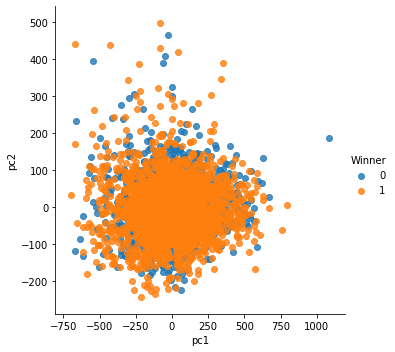

In [33]:
sns.lmplot(x="pc1", y="pc2",hue="Winner",data=pca_df1, fit_reg=False);

In [34]:
pca.explained_variance_

array([61189.91809767, 47024.77929057,  6610.75571082,  4566.31782011])

In [35]:
pca.components_

array([[-4.52731619e-03,  1.77614450e-04,  7.42374838e-05,
         1.42131602e-02,  9.21662349e-03,  8.85264554e-03,
         5.90640622e-03,  9.77403626e-02,  3.58271818e-02,
         3.52474978e-03,  2.38949586e-03,  8.60509029e-02,
         2.71974427e-02, -1.61810069e-04,  9.85369480e-03,
         7.70901764e-03,  8.85650532e-04,  1.39706973e-04,
         1.10117758e-01,  4.41230839e-02, -4.11044413e-05,
        -5.33388988e-05,  3.06007739e-03,  1.16315134e-03,
         8.26920583e-05,  1.31430102e-01,  6.27416304e-02,
         1.76548339e-04,  2.29045085e-04,  1.37829394e-02,
         8.61864146e-03,  7.65749662e-03,  5.08819538e-03,
         9.84544591e-02,  3.33859243e-02,  2.78264207e-03,
         1.90925827e-03,  8.60527563e-02,  2.46732269e-02,
        -1.10576991e-04,  9.05890204e-03,  7.09150962e-03,
         8.13275756e-04,  1.18245410e-04,  1.08894598e-01,
         4.03833780e-02, -5.40981639e-05,  7.62377030e-05,
         3.45583301e-03,  1.05615579e-03,  2.87773461e-0

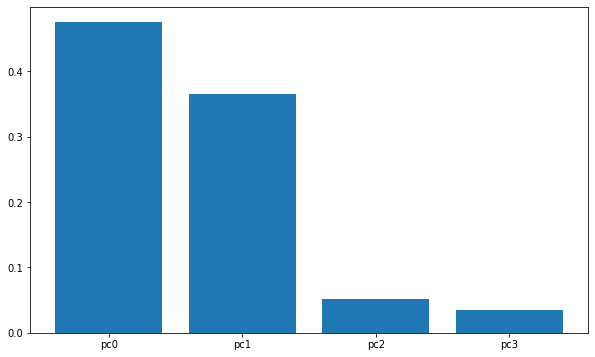

In [36]:
plt.bar(x=["pc"+str(i) for i in range(pc.shape[1])], height=pca.explained_variance_ratio_);